In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
train_dataset = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_dataset=ImageDataGenerator (rescale=1./255)

In [3]:
train = train_dataset.flow_from_directory (
    '/content/drive/My Drive/Colab Notebooks/VerdeAzul/treino',
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical')

validation = validation_dataset.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/VerdeAzul/teste',
    target_size=(128, 128), 
    batch_size=16, 
    class_mode='categorical')

analise_path = ('/content/drive/My Drive/Colab Notebooks/VerdeAzul/analise')

Found 99 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
hist = model.fit(train, epochs=10, validation_data=validation, verbose=1)

Epoch 1/10
7/7 [==============================] - 5s 494ms/step - loss: 12.0408 - accuracy: 0.4949 - val_loss: 11.1570 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 3s 391ms/step - loss: 5.6978 - accuracy: 0.6667 - val_loss: 1.9663 - val_accuracy: 0.8750
Epoch 3/10
7/7 [==============================] - 2s 241ms/step - loss: 1.9138 - accuracy: 0.7980 - val_loss: 0.8784 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 2s 237ms/step - loss: 0.2541 - accuracy: 0.8990 - val_loss: 0.1038 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 2s 266ms/step - loss: 0.2601 - accuracy: 0.9495 - val_loss: 1.9942e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 2s 251ms/step - loss: 0.1701 - accuracy: 0.9596 - val_loss: 9.3370e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 2s 246ms/step - loss: 0.0429 - accuracy: 0.9798 - val_loss: 2.2347e-04 - val_accuracy: 1.0000
Epoch 

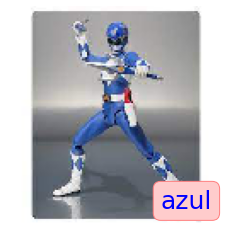

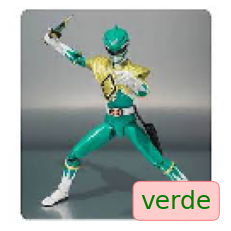

In [6]:
images = []
list_dir_path = os.listdir(analise_path)
list_dir_path.sort()

for i in list_dir_path:
  img = keras.preprocessing.image.load_img(analise_path + '/' + i, target_size = (128, 128))
  img = keras.preprocessing.image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  images.append(img)

images = np.vstack(images)

predict_images = model.predict(images)
predict_images = np.argmax(predict_images,axis=1)

for i in range(len(list_dir_path)):
  
  img = keras.preprocessing.image.load_img (analise_path + '/' + list_dir_path[i], target_size= (128, 128))
  plt.axis('off')
  plt.imshow (img)

  if (predict_images[i] == 0):
    plt.text(105.0, 114.0, "azul", size=25, color='blue',
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
  elif (predict_images[i] == 1):
    plt.text(99.0, 114.0, "verde", size=25, color='green',
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
  plt.show ()